##### RECORTANDO SHAPES DE ACORDO COM O ESTADO SELECIONADO NA SHAPE DE MUNICÍPIOS

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [27]:
# Script para automatizar recorte da shape de municípios de acordo com o estado escolhido
# Função para ler arquivos shapefile
def arquivos():
    arq = []
    while True:
        arq.append(
            input("Digite o caminho para os shapefiles a serem recortardos: ") + '\\' +
            input("Digite o nome do shapefile: ") + '.shp'
            )
        esc = input('Deseja incluir outro arquivo? [S/N] ').strip().upper()[0]
        while 'N' not in esc and 'S' not in esc:
            esc = input('Escolha inválida! Digite S para "Sim" ou N para "Não": ').strip().upper()[0]
        if esc == 'N':
            break
    return arq

# Função para abrir shapefiles com geopandas
def open_shape():
    
    return [gpd.read_file(i) for i in arquivos()]

# Função para filtrar o estado selecionado
def filtro(shp):
    return shp

# Função para recortar a shape incluída dentro do estado selecionado
def overlay():
    recorte = []
    for shapes in open_shape():
        shapes['geometry'] = shapes['geometry'].to_crs(epsg=4674)
        recorte.append(gpd.overlay(shapes, filtro(shp), how='intersection', keep_geom_type=False))
    return recorte

# Função para plotar e salvar os dados recortados sobrepostos ao estado selecionado
def plot_save():
    shp_rec = overlay()
    # Configurando o layout das áreas recortadas
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax.set_title(f'Áreas recortadas')
    base_mun = filtro(shp).plot(ax=ax, color='silver', linewidth=0.5, edgecolor='black')
    for s in shp_rec:
        s.plot(ax=base_mun, color='blue', markersize=10, linestyle='dashed', linewidth=1, marker='^')
    while True:
        esc = int(input(
            'Digite 0 para salvar as camadas recortadas e plotar os mapas ou 1 para apenas plotar os mapas: '))
        while esc != 1 and esc != 0:
            esc = int(input(
                'Escolha errada! Digite 0 para salvar as camadas e plotar os mapas ou 1 para apenas plotar os mapas: '))
        if esc == 1:
            break
        else:
            path = input('Digite o camminho onde os arquivos serão salvos: ') + '\\'
        for i, r in enumerate(shp_rec):
            r.to_file(path + 'recorte' + str(i+1) + '.shp')
        break
    return

# Função para chamar e executar as outras funções e exibir o shape de resultado
def run():
    
    return plot_save()

Digite o caminho para o arquivo shape:  C:\Users\rodri\Downloads\RS
Digite o nome do arquivo shape:  Porto Alegre
Digite o caminho para os shapefiles a serem recortardos:  C:\Users\rodri\Desktop\OSM_SUL\brazil-sul-latest-free.shp
Digite o nome do shapefile:  gis_osm_buildings_a_free_1
Deseja incluir outro arquivo? [S/N]  n
Digite 0 para salvar as camadas recortadas e plotar os mapas ou 1 para apenas plotar os mapas:  0
Digite o camminho onde os arquivos serão salvos:  C:\Users\rodri\Downloads\RS\OSM_POA


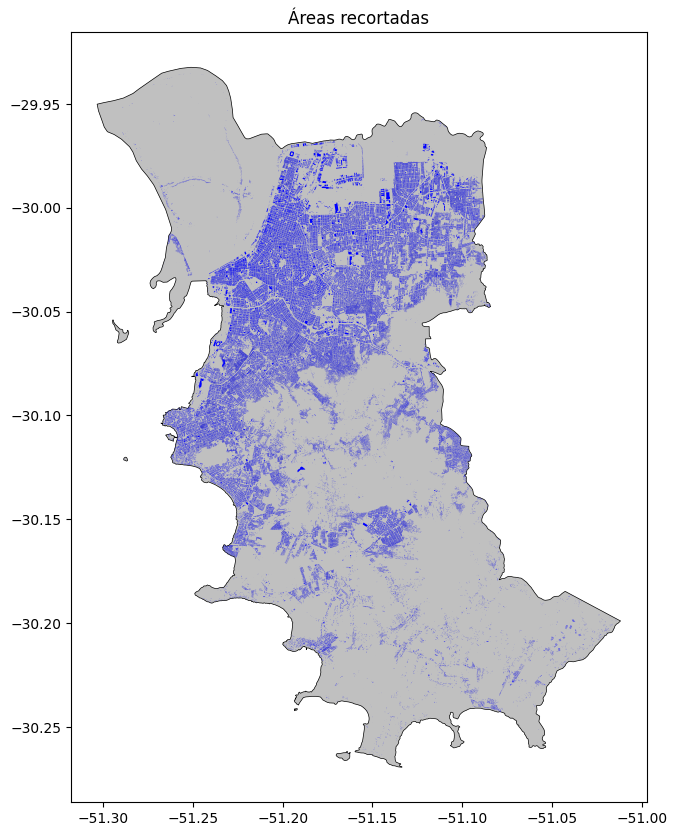

In [28]:
shp = gpd.read_file(input('Digite o caminho para o arquivo shape: ')
                   + '\\' + input('Digite o nome do arquivo shape: ') + '.shp')
shp['geometry'] = shp['geometry'].to_crs(epsg=4674)
#estado = input("Digite a UF desejada: ").upper()
run()